In [1]:
using Pkg
Pkg.activate("/media/mat/HDD/EnKF/")

"/media/mat/HDD/EnKF/Project.toml"

In [2]:
using Revise
using EnKF
using Distributions
using DocStringExtensions
using LinearAlgebra
using Plots
using RecursiveArrayTools

In [3]:
using DifferentialEquations

In [53]:
function lorenz(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

lorenz (generic function with 1 method)

In [54]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
sol = solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 1287-element Array{Float64,1}:
   0.0                  
   3.5678604836301404e-5
   0.0003924646531993154
   0.0032624016752212923
   0.00905808176456279  
   0.0169564955927642   
   0.02769000245764448  
   0.04185634375662893  
   0.06024025665362463  
   0.0836852441654334   
   0.11336451506889586  
   0.14862131186030308  
   0.18703929175446188  
   ⋮                    
  99.17448947475748     
  99.25177886977121     
  99.3340481055892      
  99.40002509604705     
  99.47321520444633     
  99.54429913558833     
  99.6304176475736      
  99.73556893651245     
  99.81512588011671     
  99.88533419341042     
  99.94751447208056     
 100.0                  
u: 1287-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]                    
 [0.999643, 0.000998805, 1.78143e-8]
 [0.996105, 0.0109654, 2.14696e-6]  
 [0.969359, 0.0897704, 0.000143801] 
 [0.924204, 0.242289, 0.00104616]   
 [0.880045, 0.43

In [67]:
Δt = 1e-3
T = tspan[1]:Δt:tspan[end]
integrator = init(prob, RK4(), adaptive =false, dt = Δt, save_everystep=false)

t: 0.0
u: 3-element Array{Float64,1}:
 1.0
 0.0
 0.0

In [64]:
states = [deepcopy(u0)]

1-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]

In [65]:
for t in T
    step!(integrator)
    push!(states, deepcopy(integrator.u))
end

In [66]:
solstates = hcat(states...)
plot(T, solstates[1,1:end-1])
plot!(T, solstates[2,1:end-1])
plot!(T, solstates[3,1:end-1])

In [70]:
step!(integrator)

In [72]:
integrator

t: 0.002
u: 3-element Array{Float64,1}:
 0.9807509443902008   
 0.055398426729789195 
 5.4778910899208854e-5

In [73]:
set_u!(integrator, u0)

true

In [78]:
integrator.u

3-element Array{Float64,1}:
 0.9807509443902008   
 0.055398426729789195 
 5.4778910899208854e-5

In [76]:
step!(integrator)

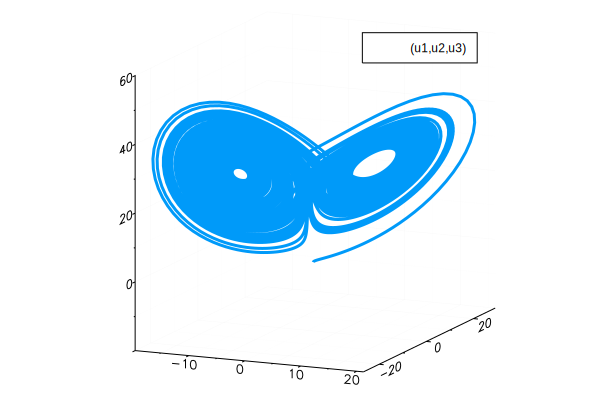

In [6]:
plot(sol,vars=(1,2,3))

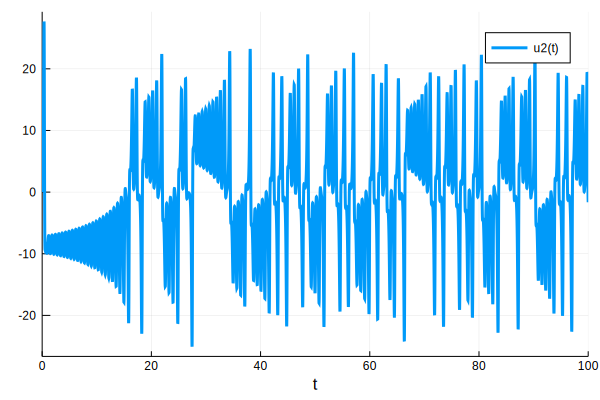

In [7]:
plot(sol,vars=(0,2))